In [1]:
import numpy as np
import ast

import pandas as pd

In [ ]:
df = pd.read_csv ('android_dataset.csv')

In [4]:
file1 = open("40_per_t.txt","r")
print("Output of Readlines after writing") 
#print(type(file1.readlines()))
a=file1.readlines()
feat=[]
for line in a:
    feat.append(line.strip('\n').replace(" ", "_"))

Output of Readlines after writing


In [5]:
feat

['RESTART_PACKAGES',
 'READ_SMS',
 'READ_PHONE_STATE',
 'SEND_SMS',
 'READ_EXTERNAL_STORAGE',
 'SYSTEM_ALERT_WINDOW',
 'WRITE_SMS',
 'RECEIVE_SMS',
 'RECEIVE_BOOT_COMPLETED',
 'CHANGE_WIFI_STATE',
 'WAKE_LOCK',
 'DISABLE_KEYGUARD',
 'ACCESS_NETWORK_STATE',
 'WRITE_SETTINGS',
 'READ_CONTACTS',
 'RECEIVE_MMS',
 'WRITE_EXTERNAL_STORAGE',
 'EXPAND_STATUS_BAR',
 'WRITE_CONTACTS',
 'CHANGE_NETWORK_STATE',
 'INTERNET',
 'READ_HISTORY_BOOKMARKS',
 'CHANGE_CONFIGURATION',
 'PROCESS_OUTGOING_CALLS',
 'GET_PACKAGE_SIZE',
 'PERSISTENT_ACTIVITY',
 'ACCESS_WIFI_STATE',
 'READ_CALL_LOG',
 'CAMERA',
 'WRITE_HISTORY_BOOKMARKS',
 'CALL_PHONE',
 'SET_WALLPAPER_HINTS',
 'GET_ACCOUNTS',
 'GET_TASKS',
 'WRITE_CALL_LOG',
 'ACCESS_FINE_LOCATION',
 'ACCESS_MOCK_LOCATION']

In [6]:
#X=df.loc[:, df.columns != 'label']
X=df.loc[:,feat]
X

,RESTART_PACKAGES,READ_SMS,READ_PHONE_STATE,SEND_SMS,READ_EXTERNAL_STORAGE,SYSTEM_ALERT_WINDOW,WRITE_SMS,RECEIVE_SMS,RECEIVE_BOOT_COMPLETED,CHANGE_WIFI_STATE,...,READ_CALL_LOG,CAMERA,WRITE_HISTORY_BOOKMARKS,CALL_PHONE,SET_WALLPAPER_HINTS,GET_ACCOUNTS,GET_TASKS,WRITE_CALL_LOG,ACCESS_FINE_LOCATION,ACCESS_MOCK_LOCATION
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,0,1,1,1,0,0,1,1,1,1,...,0,1,0,1,0,1,0,0,1,0
12030,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12031,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12032,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y=df.loc[:,'label']
Y

0        0
1        0
2        0
3        0
4        0
        ..
12029    1
12030    1
12031    1
12032    1
12033    1
Name: label, Length: 12034, dtype: int64

In [8]:
size=[0.1,0.2,0.3,0.4]
random_forest_acc=[]
random_forest_pre=[]
random_forest_recall=[]
random_forest_f1=[]
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=RandomForestClassifier(n_estimators=35)

#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy: ",s, ' ' ,metrics.accuracy_score(y_test, y_pred))
    a=max(a,metrics.accuracy_score(y_test, y_pred))
    
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    print(f1_score(y_test, y_pred, average=None))
    random_forest_acc.append(metrics.accuracy_score(y_test, y_pred))
    random_forest_pre.append(precision_score(y_test, y_pred, average="macro"))
    random_forest_recall.append(recall_score(y_test, y_pred, average="macro"))

    random_forest_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  0.328125
memory (128786, 2640391)
Accuracy:  0.1   0.9219269102990033
0.9218904854583351
0.9218421887719201
0.9224483592400692
[0.92020374 0.92357724]
time  0.34375
memory (4058036, 6304535)
Accuracy:  0.2   0.9401744910677191
0.9401618389814005
0.9403574882564244
0.9401233800755331
[0.94103194 0.93929174]
time  0.359375
memory (4079547, 8008072)
Accuracy:  0.3   0.9302132373303794
0.9301268076213574
0.9302793667531257
0.9300109004375527
[0.93258427 0.92766935]
time  0.25
memory (4101389, 8039319)
Accuracy:  0.4   0.9312422102201912
0.9311943230093771
0.9312863600280904
0.9311255574528755
[0.93300951 0.92937913]


In [9]:
size=[0.1,0.2,0.3,0.4]
nb_acc=[]
nb_pre=[]
nb_recall=[]
nb_f1=[]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=GaussianNB()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    nb_acc.append(metrics.accuracy_score(y_test, y_pred))
    nb_pre.append(precision_score(y_test, y_pred, average="macro"))
    nb_recall.append(recall_score(y_test, y_pred, average="macro"))
    nb_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8330564784053156
0.8322974522800586
0.839743752021715
0.8332891832229581
Accuracy: 0.8516825924387204
0.8504100975477706
0.8605263868421763
0.8504114549954698
Accuracy: 0.8324563832733315
0.8308674402161336
0.8407599853041515
0.8307673090780973
Accuracy: 0.8383880348982136
0.8367100543710946
0.8474936352165363
0.8364823634797124


In [10]:
size=[0.1,0.2,0.3,0.4]
k_acc=[]
k_pre=[]
k_recall=[]
k_f1=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    k_acc.append(metrics.accuracy_score(y_test, y_pred))
    k_pre.append(precision_score(y_test, y_pred, average="macro"))
    k_recall.append(recall_score(y_test, y_pred, average="macro"))
    k_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9086378737541528
0.9084253643210174
0.9083623693379791
0.9084934053288484
Accuracy: 0.9343581221437474
0.9343159362258046
0.9342982794281616
0.9343348855204433
Accuracy: 0.9238438105787871
0.9238025776793213
0.9239320049441572
0.9237243822370008
Accuracy: 0.9275031159119236
0.9273582216404259
0.9283251047581687
0.9269730460232313


In [11]:
size=[0.1,0.2,0.3,0.4]
s_acc=[]
s_pre=[]
s_recall=[]
s_f1=[]
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import tracemalloc
import os
import psutil
 
import time

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=SVC(kernel ='rbf', random_state = 1) 
#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())
 
    # stopping the library
    tracemalloc.stop()
    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    s_acc.append(metrics.accuracy_score(y_test, y_pred))
    s_pre.append(precision_score(y_test, y_pred, average="macro"))
    s_recall.append(recall_score(y_test, y_pred, average="macro"))
    s_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  3.46875
memory (5090653, 564177336)
Accuracy: 0.936046511627907
0.9360461145676036
0.9366110080395795
0.9367231404388109
time  2.9375
memory (591946, 5847925)
Accuracy: 0.9264644786040714
0.9264461461567746
0.9271928769267572
0.9265988472447382
time  2.25
memory (543472, 5125085)
Accuracy: 0.9335364165051232
0.9334040296924708
0.9341205713054452
0.9330475166960928
time  1.59375
memory (465991, 4403221)
Accuracy: 0.9281262982966348
0.9280619300626332
0.9289701623531236
0.9279251940232551


In [12]:
size=[0.1,0.2,0.3,0.4]
d_acc=[]
d_pre=[]
d_recall=[]
d_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=tree.DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    d_acc.append(metrics.accuracy_score(y_test, y_pred))
    d_pre.append(precision_score(y_test, y_pred, average="macro"))
    d_recall.append(recall_score(y_test, y_pred, average="macro"))
    d_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9186046511627907
0.9183593263495842
0.9191346268466385
0.9179112109879235
Accuracy: 0.9281262982966348
0.928095270903926
0.9289879473401694
0.9281734541281934
Accuracy: 0.9313209637219607
0.9312100446940214
0.931481942638247
0.9310208005110299
Accuracy: 0.9264644786040714
0.9264232177397071
0.9267170293591527
0.9263139268302789


In [13]:
size=[0.1,0.2,0.3,0.4]
lr_acc=[]
lr_pre=[]
lr_recall=[]
lr_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    lr_acc.append(metrics.accuracy_score(y_test, y_pred))
    lr_pre.append(precision_score(y_test, y_pred, average="macro"))
    lr_recall.append(recall_score(y_test, y_pred, average="macro"))
    lr_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9177740863787376
0.9177195398490324
0.917733848781605
0.9187726830131894
Accuracy: 0.9293726630660574
0.9293111573628756
0.9292716041705533
0.9293558561609282
Accuracy: 0.9191359734145667
0.9190845857276165
0.9194090617292293
0.9189640603253386
Accuracy: 0.9223099293726631
0.9222647935291614
0.9223892761631227
0.9221862329024111


In [14]:

import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
#t = ['10%','20%','SVM','Naive Bayes','Decision tree']
t = ['10%','20%','30%','40%']
x_axis = np.arange(len(t))
ind = np.arange(len(t)) 
width = 0.1

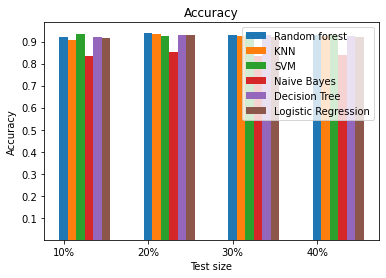

In [16]:
plt.bar(ind, random_forest_acc, width, label = 'Random forest')
plt.bar(ind+width, k_acc, width, label = 'KNN')
plt.bar(ind+width*2, s_acc, width, label = 'SVM')
plt.bar(ind+width*3, nb_acc, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_acc, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_acc, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
# Display

#plt.show()
plt.savefig('40_per_t/acc.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

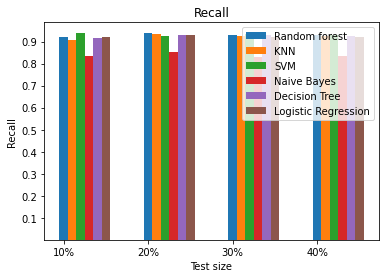

In [17]:
plt.bar(ind, random_forest_recall, width, label = 'Random forest')
plt.bar(ind+width, k_recall, width, label = 'KNN')
plt.bar(ind+width*2, s_recall, width, label = 'SVM')
plt.bar(ind+width*3, nb_recall, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_recall, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_recall, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall")
# Display

#plt.show()
plt.savefig('40_per_t/recall.png',facecolor=(1, 1, 1),dpi=200)

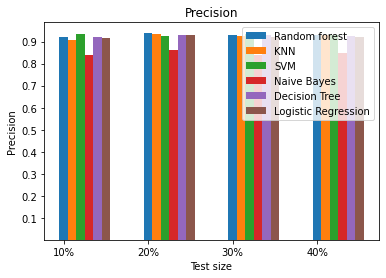

In [18]:
plt.bar(ind, random_forest_pre, width, label = 'Random forest')
plt.bar(ind+width, k_pre, width, label = 'KNN')
plt.bar(ind+width*2, s_pre, width, label = 'SVM')
plt.bar(ind+width*3, nb_pre, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_pre, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_pre, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision")
# Display

#plt.show()
plt.savefig('40_per_t/Precision.png',facecolor=(1, 1, 1),dpi=200)

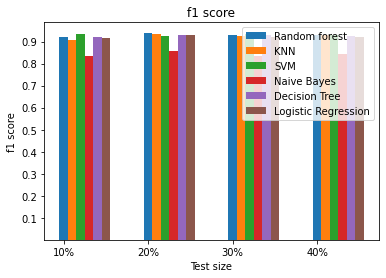

In [19]:
plt.bar(ind, random_forest_f1, width, label = 'Random forest')
plt.bar(ind+width, k_f1, width, label = 'KNN')
plt.bar(ind+width*2, s_f1, width, label = 'SVM')
plt.bar(ind+width*3, nb_f1, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_f1, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_f1, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("f1 score")
plt.legend()
plt.title("f1 score")
# Display

#plt.show()
plt.savefig('40_per_t/f1_score.png',facecolor=(1, 1, 1),dpi=200)

In [20]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_acc)
per_22.append(k_acc)
per_22.append(s_acc)
per_22.append(nb_acc)
per_22.append(d_acc)
per_22.append(lr_acc)
df_acc = pd.DataFrame(per_22)
df_acc=df_acc.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_acc.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_acc.to_csv('40_per_t/acc.csv')


In [21]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_recall)
per_22.append(k_recall)
per_22.append(s_recall)
per_22.append(nb_recall)
per_22.append(d_recall)
per_22.append(lr_recall)
df_recall = pd.DataFrame(per_22)
df_recall=df_recall.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_recall.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_recall.to_csv('40_per_t/recall.csv')


In [22]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_pre)
per_22.append(k_pre)
per_22.append(s_pre)
per_22.append(nb_pre)
per_22.append(d_pre)
per_22.append(lr_pre)
df_pre = pd.DataFrame(per_22)
df_pre=df_pre.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_pre.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_pre.to_csv('40_per_t/pre.csv')


In [23]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_f1)
per_22.append(k_f1)
per_22.append(s_f1)
per_22.append(nb_f1)
per_22.append(d_f1)
per_22.append(lr_f1)
df_f1 = pd.DataFrame(per_22)
df_f1=df_f1.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_f1.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_f1.to_csv('40_per_t/f1.csv')
